In [ ]:
!git clone "https://github.com/Abhivandhana/CV"

Cloning into 'CV'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 31
Receiving objects: 100% (39/39), 5.69 MiB | 34.47 MiB/s, done.
Resolving deltas: 100% (1/1), done.


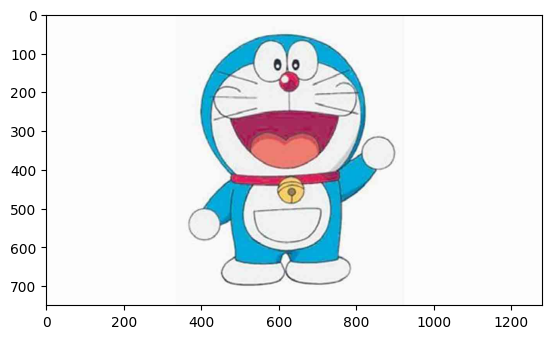

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("CV/doraemon.jpg")
plt.imshow(img[:,:,::-1])

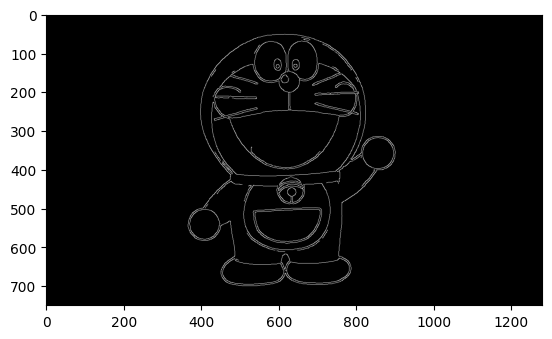

In [ ]:
# Convert to Grayscale
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur Image
blurImg = cv2.GaussianBlur(grayImg, (3, 3), 0)
# Canny
cannyImg = cv2.Canny(blurImg, 100, 200)

plt.imshow(cannyImg, cmap='gray')

1 objects were found in this image.


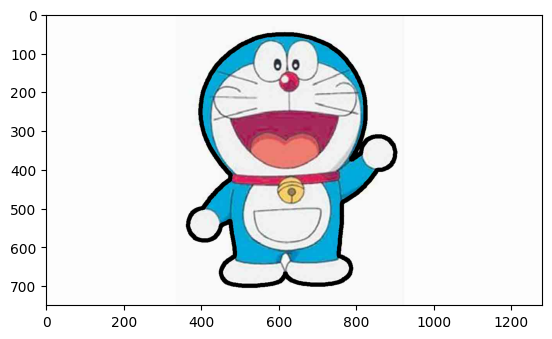

In [ ]:
# find the contours
contours, _ = cv2.findContours(cannyImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgCopy = img.copy()
# draw the contours
cv2.drawContours(imgCopy, contours, -1, (0, 0, 0), 10)
print(len(contours), "objects were found in this image.")
plt.imshow(imgCopy[:,:,::-1])

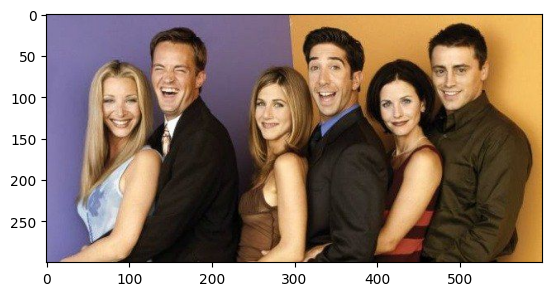

In [ ]:
img = cv2.imread(r"CV/friends.jpg")
plt.imshow(img[:,:,::-1])

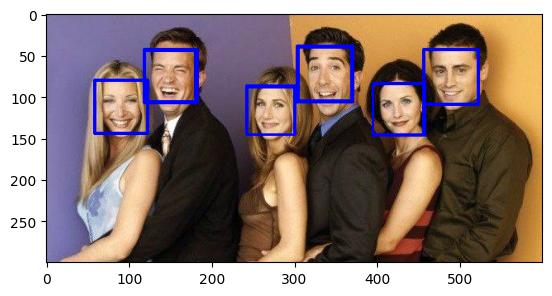

In [ ]:
face_cascade = cv2.CascadeClassifier(r'CV/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img[:,:,::-1])

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.8 MB/s eta 0:00:00


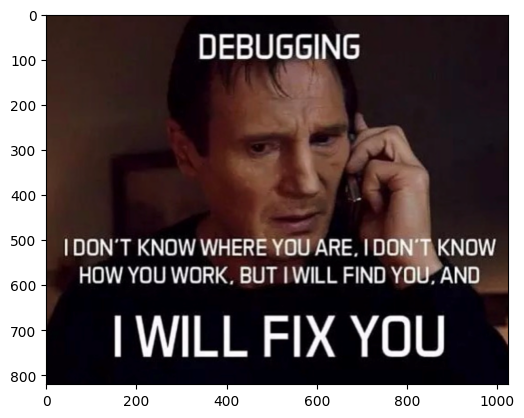

In [ ]:
import easyocr
img = cv2.imread(r"CV/text.png")
plt.imshow(img[:,:,::-1])

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(img)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[330, 34], [706, 34], [706, 110], [330, 110]],
  'DEBUGGING',
  0.9919825014031037),
 ([[30, 490], [1004, 490], [1004, 546], [30, 546]],
  "IDON'T KNOW WHERE YOU ARE. IDON'T KNOW",
  0.6136711656995478),
 ([[65, 551], [522, 551], [522, 606], [65, 606]],
  'HOW YOU WORK , BUT',
  0.4933248953719331),
 ([[540, 552], [970, 552], [970, 606], [540, 606]],
  'WILL FIND YOU, AND',
  0.9161960272045035),
 ([[182, 652], [900, 652], [900, 776], [182, 776]],
  'WILL FIX YOU',
  0.8924117918175745)]

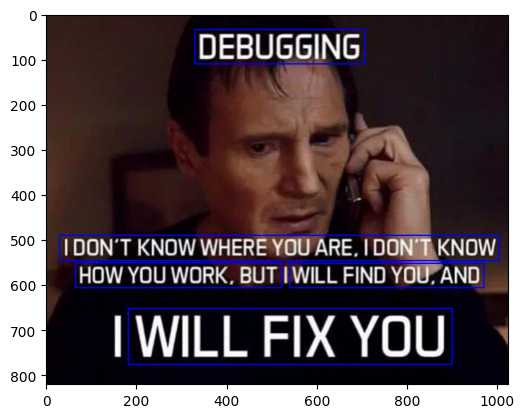

In [ ]:
for i in result:
    [w, x, y, z] = i[0]
    cv2.rectangle(img, w, y, (255, 0, 0), 2)
plt.imshow(img[:,:,::-1])